## Four algorithms in Qiskit Part 1

In [1]:
# Importing libraries and necessary tools

from qiskit import *
import numpy as np
import math
import random
from qiskit.visualization import plot_histogram

from qiskit.providers.fake_provider import FakeJakarta, FakeBelem

### Deutsch-Jozsa Algorithm

In [2]:
""" Defining an almost general oracle for the algorithm"""

def oracle(N, case):
    
    # Creating a quantum circuit with N input qubits and 1 helper qubits
    
    qc = QuantumCircuit(N+1)

    # Create an oracle based on the type of the function
    
    m = random.randint(0,1) # Creating a random bit to make the decision process random
    
    if(case == 'balanced') and (m == 0):
        
        for iz in range(N):
            qc.cx(iz,N)                     # Balanced function type 1
                                            
        
    elif (case == 'balanced') and (m == 1):
        
        qc.x(0)
        
        for iz in range(N):
            qc.cx(iz,N)                    # Balanced oracle flips helper qubit when the 0th qubit is 0
       
        qc.x(0)                            # Balanced function type 2 
                                             
    elif (case == 'constant') and (m == 0):
        
        qc.x(N)                            # Applying X gate on the (N+1)th qubit
                                           # Constant function type 1
            
    else:
        qc.i(N)                            # Applying identity on the (N+1)th qubit
                                           # Constant function type 1

    return qc

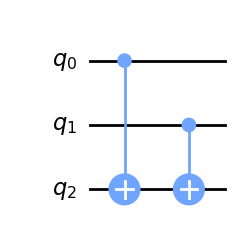

In [3]:
# Checking the oracle function for 2 bits and type of function equal to balanced

cir = oracle(2, 'balanced')
cir.draw('mpl')

In [4]:
""" Defining a function for Deutsch-Jozsa algorithm 
    Input: N - Number of bits in the input string for the function to be determined
           oracle1- black box encoding the function to be determined
    Output: qc - the quantum circuit to be run on a simulator to get the final output """

def DJ_algo_gen(N, oracle1):
    
    # Create a quantum circuit of 'N+1' qubits where N is the number of bits in the input bitstring

    qc = QuantumCircuit(N+1, N)

    # Apply X gate on the helper qubit to change it's state from 0 to 1

    qc.x(N)
    qc.barrier()                       # Barrier for better visualization

    # Apply Hadamard gates on all qubits to create superposition and access all the possible cases at same time

    qc.h(range(0,N+1))
    qc.barrier()                       # Barrier for better visualization

    # Apply the oracle for the funtion to the quantum circuit

    qc.append(oracle1, range(N+1))
    qc.barrier()                        # Barrier for better visualization

    # Apply Hadamard gates to all qubits 

    qc.h(range(N+1))
    qc.barrier()                       # Barrier for better visualization

    # Measure first N qubits to find if the function is constant or balanced

    qc.measure(range(N), range(N))

    return qc

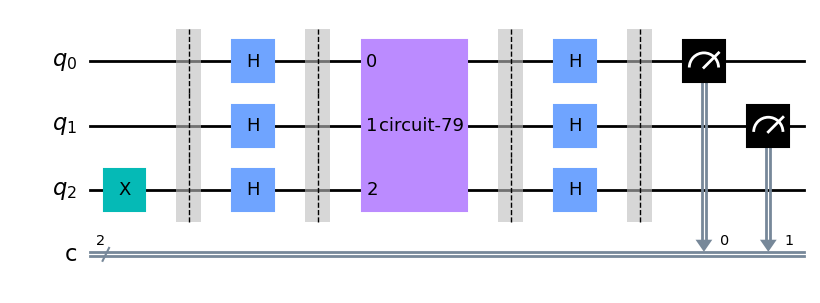

In [5]:
# Testing the algorithm for n=2 and constant function

ora  = oracle(2, 'constant')

q1 = DJ_algo_gen(2, ora)
q1.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


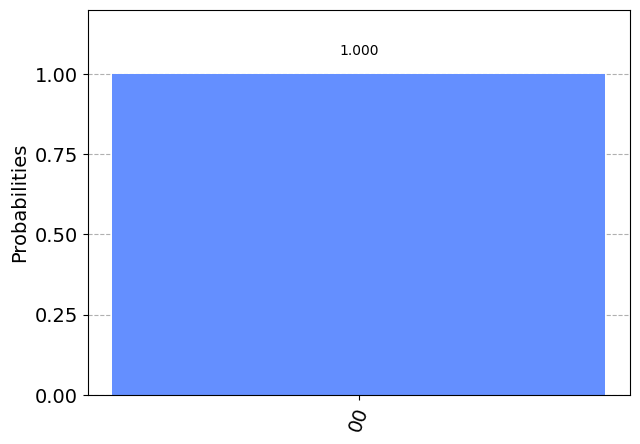

In [6]:
# Running on non-noisy simulator 1

backend = Aer.get_backend('aer_simulator')
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

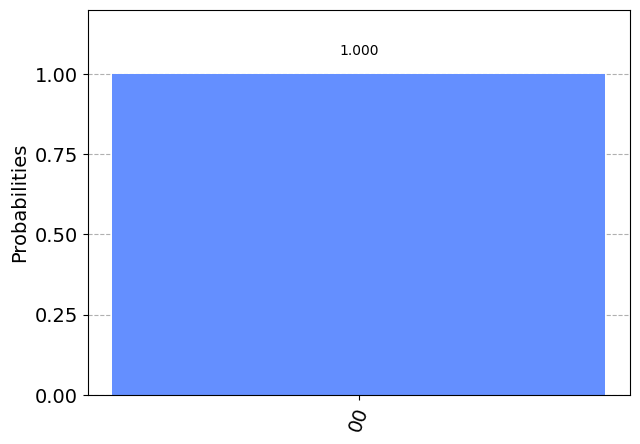

In [7]:
# Running on non-noisy simulator 2

backend = Aer.get_backend('qasm_simulator')
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

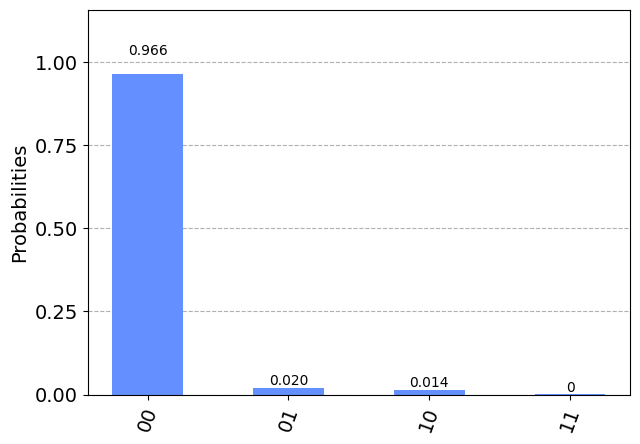

In [8]:
# Running on noisy simulator 1

backend = FakeJakarta()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

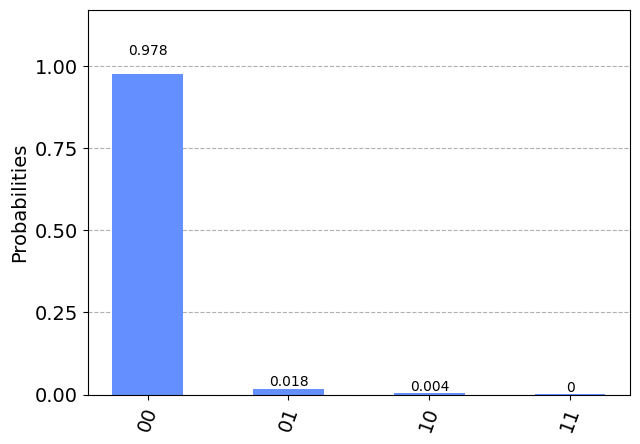

In [9]:
# Running on noisy simulator 2

backend = FakeBelem()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

In [10]:
# Defining a function that gives the output directly without running many cells

# N - number of bits in input bit string
# case - type of function to be given as a string either 'constant' or 'balanced'
# sim: simulator on which you want to run the algorithm
#.    - 1: non-noisy aer simulator
#       2: non-noisy qasm simulator
#       3: noisy simulator FakeJakarta
#       4: noisy simulator FakeBelem
# Output: counts, if maximum counts is for '0'*N, the function is constant
#                 if maximum counts is for '1'*N, the function is balanced

def run(N, case, sim):
    
    oracle_1  = oracle(N, case)

    q1 = DJ_algo_gen(N, oracle_1)
    
    count = 0
    
    if sim==1:
        
        backend = Aer.get_backend('aer_simulator')
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
    
    elif sim == 2:
        
        backend = Aer.get_backend('qasm_simulator')
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
        
    elif sim == 3:
        
        backend = FakeJakarta()
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
        
    else:
        
        backend = FakeBelem()
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
    
    return count


In [11]:
# Testing the algorithm for N=3 and balanced function on all 4 simulators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


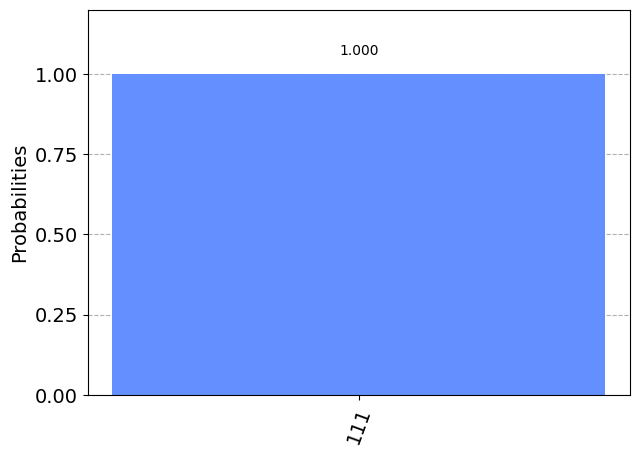

In [12]:
plot_histogram(run(3, 'balanced', 1))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


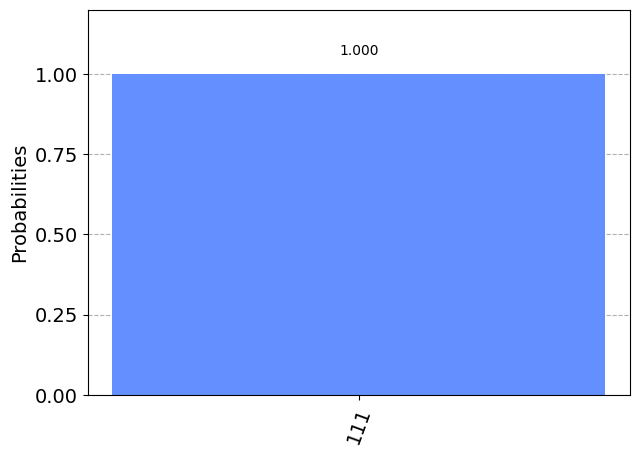

In [13]:
plot_histogram(run(3, 'balanced', 2))

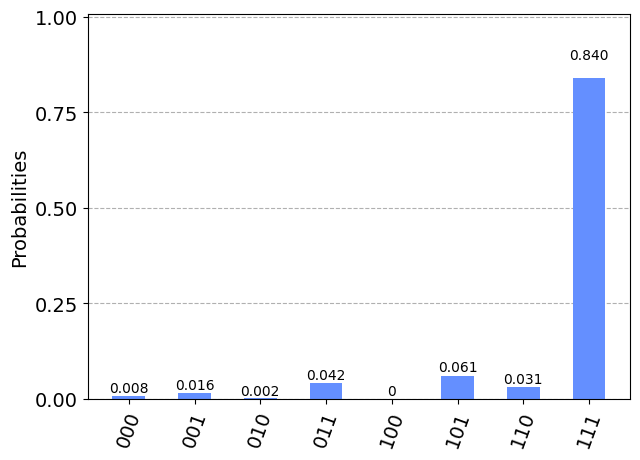

In [14]:
plot_histogram(run(3, 'balanced', 3))

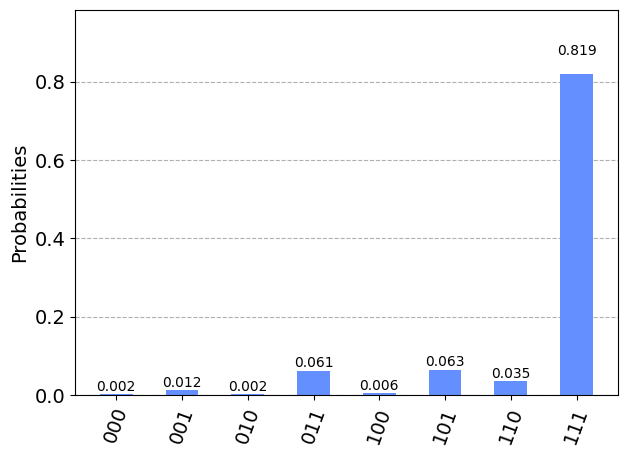

In [15]:
plot_histogram(run(3, 'balanced', 4))

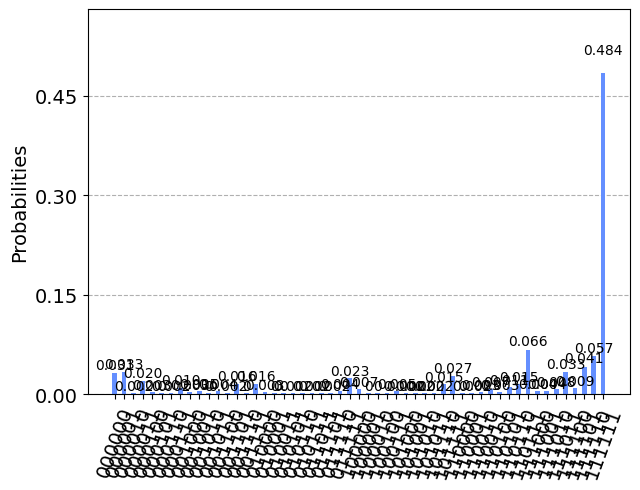

In [16]:
# Testing the algorithm for N=6 and Balanced functon on noisy simulator

plot_histogram(run(6, 'balanced', 3))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


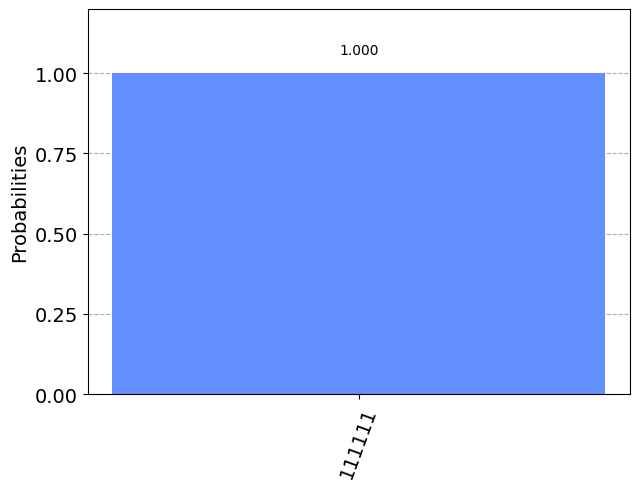

In [18]:
# Testing the algorithm for N=6 and Balanced functon on non - noisy simulator

plot_histogram(run(6, 'balanced', 2))

In [20]:
plot_histogram(run(6, 'balanced', 4))

TranspilerError: 'Number of qubits (7) in circuit-4691 is greater than maximum (5) in the coupling_map'

In [19]:
plot_histogram(run(8, 'balanced', 3))

TranspilerError: 'Number of qubits (9) in circuit-4687 is greater than maximum (7) in the coupling_map'

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


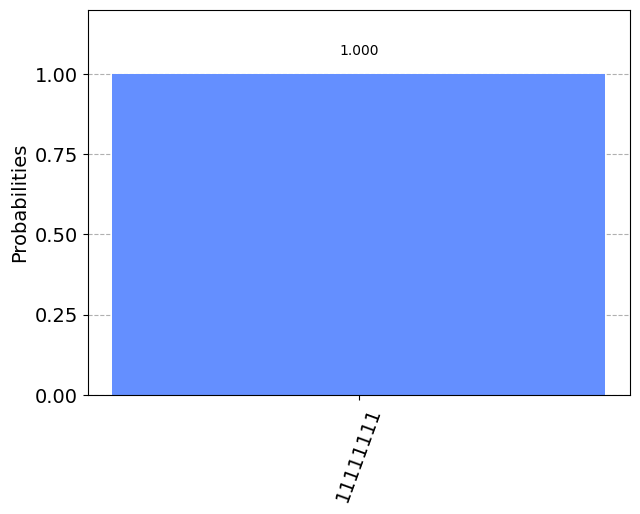

In [21]:
plot_histogram(run(8, 'balanced', 1))

In [31]:
plot_histogram(run(1000, 'balanced', 1))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [32]:
plot_histogram(run(1000, 'balanced', 2))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
